## EXPLORATORY DATA ANALYSIS ON COVID-19 

!['Covid-19 Analysis'](./Covid.jpg)

## Data Identification

1. I have used following end points of the API to fetch my data.
    * __Endpoint 1:__ To fetch the latest stats for all countries.
    https://coronavirus-monitor.p.rapidapi.com/coronavirus/cases_by_country.php.
    
    * __Endpoint 2:__ To fetch Covid-19 stats for specified date and country.
    https://coronavirus-monitor.p.rapidapi.com/coronavirus/history_by_country_and_date.php
    
    
2. Enpoint 1: Returns real time stats of each country affected by Covid-19.


3. Enpoint 2: Returns variation of stat of the specified country on a particular date specified.


4. Every record returned from the above API are characterised by the following number of features.
    * __'country_name':__ Country affected by virus.
    * __'cases':__ Total number of cases till now.
    * __'deaths':__ Total deaths till now.
    * __'region':__ Region of the country affected
    * __'total_recovered':__ Total people recovered from the disease.
    * __'new_deaths':__ New deaths on current date.
    * __'new_cases':__ New cases on current date.
    * __'serious_critical':__ Number of people which are critical
    * __'active_cases':__ Total active cases.
    * __'total_cases_per_1m_population':__ Ratio of number of people affected in 1 million population.

In [1]:
# Importing necessary libraries.
import os
import requests
import json
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime,timedelta
from pandas.io.json import json_normalize

## Data Collection

__Constraints:__ The Data is very dynamic and changes every day. So to keep a track of all the days is difficult as new countries also keep on adding. Hence only data for last seven is used for data collection and analysis.

__API fetching requirements:__ To fetch data we need authentication i,e Key and host which is being provided in headers.

__Storage:__ The data collected from the API is in json format. So the data is first loaded into dataframe and stored into a csv file. Since the data is quite big fetching it from API every time is a time taking process hence stored in a csv file. Later that csv file is read into dataframe for easier pre-proccessing and analysis.

In [2]:
# Header consist of the authentication details. It consists of API Key and the Host name
headers = {
    'x-rapidapi-host': "coronavirus-monitor.p.rapidapi.com",
    'x-rapidapi-key': "7d747fc50bmsh190272d095ee3aep142374jsnb411b79b5057"
    }

### Data Collection: Fetching latest stats from API and storing them to a file.

In [3]:
# Get latest stats for all countries.
# Endpoint to fetch the latest information.
url = "https://coronavirus-monitor.p.rapidapi.com/coronavirus/cases_by_country.php"

# The enpoint returns a json format data. Hence used json module to parse the data appropriately.
response = requests.request("GET", url, headers=headers)
country_wise_data = json.loads(response.text)

# Store the json data into the dataframe. All required stats(values) are mapped to key "countries_stat", hence reterived the data likewise we do with dictionary.
latest_stats_df = pd.DataFrame(country_wise_data['countries_stat'])
latest_stats_df.head()

country_name    cases  deaths region total_recovered new_deaths new_cases  \
0          USA  142,793   2,490                  4,562          6       333   
1        Italy   97,689  10,779                 13,030          0         0   
2        Spain   85,195   7,340                 16,780        537     5,085   
3      Germany   63,079     545                  9,211          4       644   
4         Iran   41,495   2,757                 13,911        117     3,186   

  serious_critical active_cases total_cases_per_1m_population  
0            2,970      135,741                           431  
1            3,906       73,880                         1,616  
2            5,231       61,075                         1,822  
3            1,979       53,323                           753  
4            3,511       24,827                           494

In [4]:
# Saving the latest stat into local filesystem by appending today's date at the end.
latest_stats_df.to_csv(r'.\total_cases\covid_19_cases_'+ str(datetime.now().date())+'.csv')

In [5]:
# Fetching latest list of countries that are affected by COVID-19 and storing them into a list for later analysis.
country_list = latest_stats_df['country_name'].values

# A method which return a list of past seven dates.
def list_last_dates():
    yesterday = datetime.now().date() - timedelta(days=1)
    week_ago_date = yesterday - timedelta(days=7) 
    date_time_list = pd.date_range(week_ago_date, yesterday).tolist()
    list_dates = [str(datetime.date(date)) for date in date_time_list]
    return list_dates

# A method to create a directory in filesystem specified by the user if doesn't already exsits.
def createDir(parent_dir):
    if(not os.path.isdir(parent_dir)):
        os.mkdir(parent_dir)
    else:
        print('Directory',parent_dir,'already exists...')

# A method to create a sub-directory in filesystem specified by the user if doesn't already exsits. Use to create country wise directories.
def createSubDir(parent_dir, sub_dir):
    path = os.path.join(parent_dir,sub_dir)
    if(not os.path.isdir(path)):
        os.mkdir(path)
    else:
        print('Directory',path,'already exists...')

### Data Collection: Retrieving data from Endpoint-2 for each country from last seven days and storing them into the file.

### Warning!!: This block of code will take about 30mins.

In [6]:
'''
# URL to reterive data from.
url_country_date = "https://coronavirus-monitor.p.rapidapi.com/coronavirus/history_by_country_and_date.php"

# Name of the directory to be created on the filesystem. 
path_dir_lastweek = 'lastweek'
createDir(path_dir_lastweek)

#Generating list of last seven dates to fetch records for. 
last_seven_dates = list_last_dates()

# Iterating over each country from the country list.
for country in country_list:
    # A dataframe to store all the records of the country for last seven days.
    last_week_df = pd.DataFrame()
    
    #Creating sub_directories of each country.
    cur_path = os.path.join(path_dir_lastweek,country)
    createDir(cur_path)
    
    #Iterating over each date
    for date in last_seven_dates:
        
        # Query string passed to the endpoint.
        querystring = {"country":country,"date":date}
        
        # Getting stats of a specific country by specified date 
        cur_date_response = requests.request("GET", url_country_date, headers=headers, params=querystring)
        
        #loading the json data
        cur_date_json = json.loads(cur_date_response.text)
        
        #creating the dataframe by stat_by country
        cur_date_df = pd.DataFrame(cur_date_json['stat_by_country'])

        #Appending last 7 days data into the dataframe
        last_week_df = last_week_df.append(cur_date_df,ignore_index=True)
    
    # Saving specific country past 7 days data into the file.
    last_week_df.to_csv(cur_path+'/{}.csv'.format(country))
'''

'\n# URL to reterive data from.\nurl_country_date = "https://coronavirus-monitor.p.rapidapi.com/coronavirus/history_by_country_and_date.php"\n\n# Name of the directory to be created on the filesystem. \npath_dir_lastweek = \'lastweek\'\ncreateDir(path_dir_lastweek)\n\n#Generating list of last seven dates to fetch records for. \nlast_seven_dates = list_last_dates()\n\n# Iterating over each country from the country list.\nfor country in country_list:\n    # A dataframe to store all the records of the country for last seven days.\n    last_week_df = pd.DataFrame()\n    \n    #Creating sub_directories of each country.\n    cur_path = os.path.join(path_dir_lastweek,country)\n    createDir(cur_path)\n    \n    #Iterating over each date\n    for date in last_seven_dates:\n        \n        # Query string passed to the endpoint.\n        querystring = {"country":country,"date":date}\n        \n        # Getting stats of a specific country by specified date \n        cur_date_response = request

## Data Preperation and Analysis

* Load and represent the data using an appropriate data structure (i.e.records/items as rows, described by features as columns).

* Apply any preprocessing steps that might be required to clean or filter the data before analysis. Where more than one API is used, apply suitable data integration methods.

* Analyse, characterise, and summarise the cleaned dataset, using tables and plots where appropriate. Clearly explain and interpret any analysis results which are produced.

* Summarise any insights which you gained from your analysis of the data. Suggest ideas for further analysis which could be performed on the data in future.

In [7]:
# Reading latest countries stat from the filesystem

# Root directory to look for the latest stats file 
root_stat = 'total_cases'

# A Datframe to store the read data.
latest_stat_df = pd.DataFrame()

# Walking through the filesystem and loading data into dataframe 
for root, directories, files in os.walk(root_stat):
    for file in files:
        # We only need to load today's latest stats hence using date parameter.
        today_date = str(datetime.now().date())
        # If the file has todays date then only pick that file.
        if today_date in file:
            file_name = file
latest_stats_by_country = pd.read_csv(root_stat+'\\'+file_name, index_col=0)
latest_stats_by_country.head()

country_name    cases  deaths  region total_recovered  new_deaths new_cases  \
0          USA  142,793   2,490     NaN           4,562           6       333   
1        Italy   97,689  10,779     NaN          13,030           0         0   
2        Spain   85,195   7,340     NaN          16,780         537     5,085   
3      Germany   63,079     545     NaN           9,211           4       644   
4         Iran   41,495   2,757     NaN          13,911         117     3,186   

  serious_critical active_cases total_cases_per_1m_population  
0            2,970      135,741                           431  
1            3,906       73,880                         1,616  
2            5,231       61,075                         1,822  
3            1,979       53,323                           753  
4            3,511       24,827                           494

### Data Pre-Processing: Null value check

In [8]:
#Checking which columns have null values present.
print('shape:',latest_stats_by_country.shape)
print('Total null values in each column:')
latest_stats_by_country.isnull().sum()

shape: (201, 10)
Total null values in each column:


country_name                       0
cases                              0
deaths                             0
region                           201
total_recovered                    0
new_deaths                         0
new_cases                          0
serious_critical                   0
active_cases                       0
total_cases_per_1m_population      0
dtype: int64

### Pre-Processing : Removal of unnecessary fields

In [9]:
# As we can see region doesn't have any value for all the records hence we can remove this column
latest_stats_by_country.drop(['region'], axis=1, inplace=True)
print('After removing null columns!')
print('Stats after removing region column')
latest_stats_by_country.isnull().sum()

After removing null columns!
Stats after removing region column


country_name                     0
cases                            0
deaths                           0
total_recovered                  0
new_deaths                       0
new_cases                        0
serious_critical                 0
active_cases                     0
total_cases_per_1m_population    0
dtype: int64

In [10]:
# In order to consider the field for further analysis the type of all the fields are checked.
latest_stats_by_country.dtypes

country_name                     object
cases                            object
deaths                           object
total_recovered                  object
new_deaths                        int64
new_cases                        object
serious_critical                 object
active_cases                     object
total_cases_per_1m_population    object
dtype: object

### Pre-Processing : Extracting Numerical Data

In [11]:
# From above it is evident that most fields are of object type they must be converted to numerical value before analysis.

#Taking all numerical column to a list for easier conversion.
all_stat_columns = latest_stats_by_country.columns.to_list()
only_numeric_stat_columns = all_stat_columns[1:]

# Converting columns to float data type.

# Removing ',' in numerical values.
latest_stats_by_country[only_numeric_stat_columns] = latest_stats_by_country[only_numeric_stat_columns].replace(to_replace=',', value='', regex=True) 

# Converting values to float type.
latest_stats_by_country[only_numeric_stat_columns] = latest_stats_by_country[only_numeric_stat_columns].astype(float)

# Sorting data as per decending order of cases
latest_stats_by_country.sort_values(by='cases',inplace=True, ascending=False)

### Data Insights

### __A:__  Table showing statistics of covid-19 for each country. Also highlighting maximum value in each column.

In [12]:
# Visualizing Dataframe by highlighting heighest cases in each column via a color code.
latest_stats_by_country.style.background_gradient(cmap='YlOrRd')

### __B:__ Heatmap Showing correlation between different parameters.

In [13]:
#Plotting Heat map of correlation.
latest_stats_by_country.corr().style.background_gradient(cmap='Reds')

### __C:__ Visualizing correlation between Active cases and Deaths.

Text(0, 0.5, 'Total Deaths')

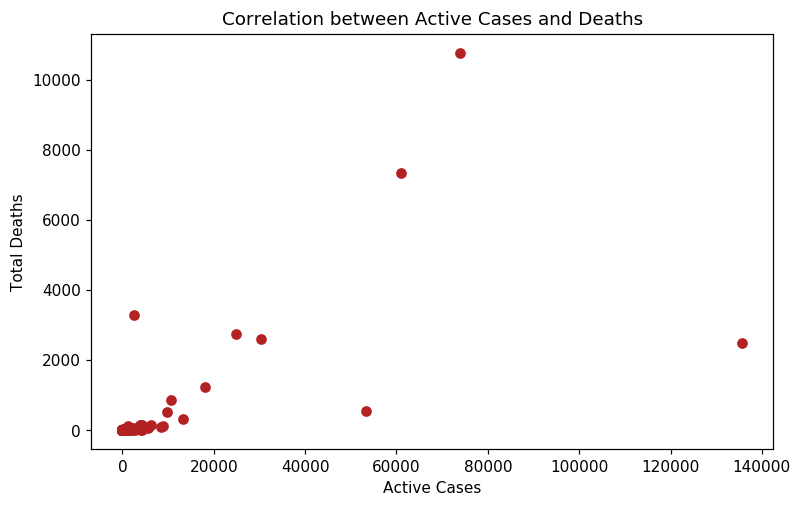

In [14]:
# Showing correlation between Deaths and Active cases using a Scatter plot.

plt.figure(figsize=(8,5),dpi=110)
plt.scatter(latest_stats_by_country['active_cases'], latest_stats_by_country['deaths'],c='#B22222')
plt.title('Correlation between Active Cases and Deaths')
plt.xlabel('Active Cases')
plt.ylabel('Total Deaths')

In [15]:
# Overall stats for all countries combined.
overall_stats_df = pd.DataFrame({
'Total Confirmed':latest_stats_by_country['cases'].sum(),
'Deaths' :latest_stats_by_country['deaths'].sum(),
'Recovered' : latest_stats_by_country['total_recovered'].sum(),
'Active' : latest_stats_by_country['active_cases'].sum(),
'Critical' : latest_stats_by_country['serious_critical'].sum(),
'Mild' : latest_stats_by_country['active_cases'].sum() - latest_stats_by_country['serious_critical'].sum()
}, index=[0])
overall_stats_df.style.background_gradient(cmap='YlOrRd', axis=1)

### __D:__ Showing latest stats for Total cases, Deaths, Recovered, Active cases, critical cases and Mild cases.

([0, 1, 2, 3, 4, 5], <a list of 6 Text xticklabel objects>)

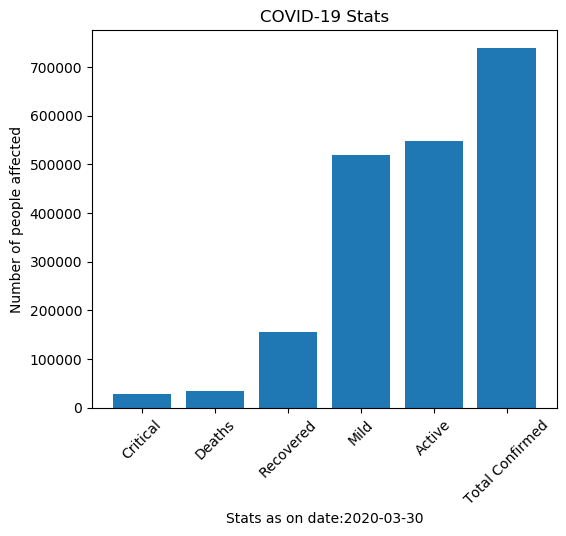

In [16]:
sorted_overall_stats_df = overall_stats_df.transpose().sort_values(by=0)
plt.figure(figsize=(6,5), dpi=100)
plt.tick_params(labelsize = 10)
plt.title('COVID-19 Stats')
plt.xlabel('Stats as on date:{}'.format(datetime.today().date()))
plt.ylabel('Number of people affected')
plt.bar(sorted_overall_stats_df.index.values, sorted_overall_stats_df[0].values)
plt.xticks(rotation=45)

### __E:__ Top 10 countries having highest number of COVID-19 cases

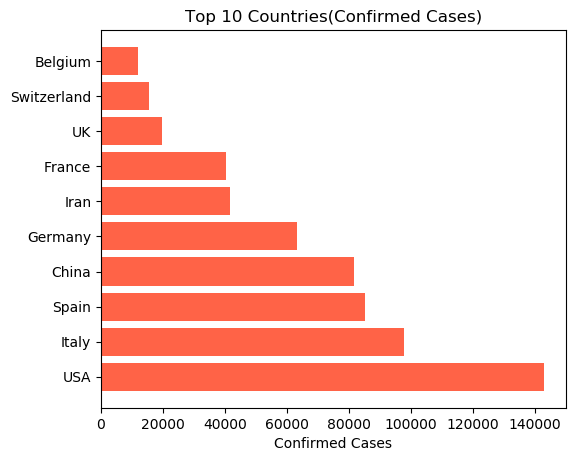

In [17]:
plt.figure(figsize=(6,5), dpi=100)
plt.tick_params(labelsize = 10)
countries = latest_stats_by_country.iloc[0:10]['country_name'].values
cases = latest_stats_by_country.iloc[0:10]['cases'].values
plt.xlabel('Confirmed Cases')
plt.title('Top 10 Countries(Confirmed Cases)')
plt.barh(countries,cases, color='#FF6347')
plt.show()

### __F.__ Top 10 countries having highest number of COVID-19 deaths

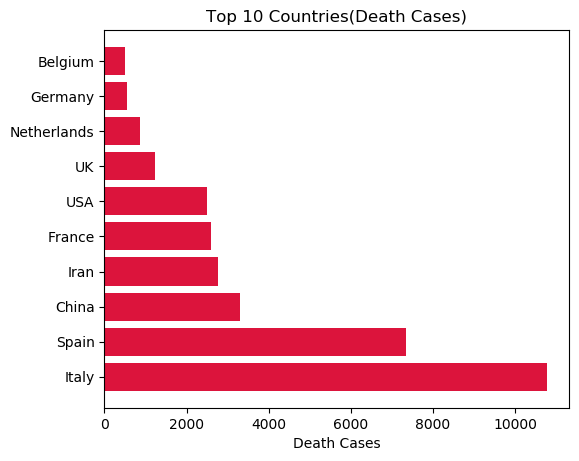

In [18]:
#Top 10 countries that have maximum death tolls.
countries_by_most_death_cases = latest_stats_by_country.sort_values(by='deaths',ascending=False)
plt.figure(figsize=(6,5), dpi=100)
plt.tick_params(labelsize = 10)
countries = countries_by_most_death_cases.iloc[0:10]['country_name'].values
deaths = countries_by_most_death_cases.iloc[0:10]['deaths'].values
plt.xlabel('Death Cases')
plt.title('Top 10 Countries(Death Cases)')
plt.barh(countries,deaths, color='#DC143C')
plt.show()

## Data Collection and Pre-Processing for Weekly Data

### Collection: Collecting stats of COVID-19 for last 7 days

In [19]:
#Reading all stats for last seven days into the DataFrame
root_stat = 'lastweek'
weekly_stat_df = pd.DataFrame()
for root, directories, files in os.walk(root_stat):
    for file in files:
        sub_dir = file[0:len(file)-4]
        file_path = os.path.join(root_stat,sub_dir,file)
        cur_df = pd.read_csv(file_path, index_col=0)
        weekly_stat_df = weekly_stat_df.append(cur_df)
weekly_stat_df.shape

(230944, 12)

In [20]:
# Checking few records.
weekly_stat_df.head()

id country_name total_cases new_cases active_cases total_deaths  \
0  100876  Afghanistan          24       NaN           23          NaN   
1  101065  Afghanistan          24       NaN           23          NaN   
2  101254  Afghanistan          24       NaN           23          NaN   
3  101443  Afghanistan          24       NaN           23          NaN   
4  101632  Afghanistan          24       NaN           23          NaN   

   new_deaths total_recovered serious_critical  region total_cases_per1m  \
0         NaN               1              NaN     NaN               0.6   
1         NaN               1              NaN     NaN               0.6   
2         NaN               1              NaN     NaN               0.6   
3         NaN               1              NaN     NaN               0.6   
4         NaN               1              NaN     NaN               0.6   

               record_date  
0  2020-03-22 00:00:02.483  
1  2020-03-22 00:10:02.327  
2  2020-03-22 00:20:02.401  
3  2020-03-22 00:30:02.053  
4   2020-03-22 00:40:02.56

### Pre-Processing: Removal of null columns

In [21]:
#Checking null value counts
weekly_stat_df.isnull().sum()

id                        0
country_name              0
total_cases               0
new_cases            132619
active_cases              0
total_deaths         110315
new_deaths           190660
total_recovered       93599
serious_critical     134116
region               230944
total_cases_per1m      1412
record_date               0
dtype: int64

In [22]:
#Removing region column as it has all values=NaN
weekly_stat_df = weekly_stat_df.drop(['region'], axis=1)

#Replacing rest of the null values by a constant=0 as these are times when data were recorded but no new updates to make in the record.
weekly_stat_df = weekly_stat_df.fillna(0)

#Checking null counts after replacing and removing null values
weekly_stat_df.isnull().sum()

id                   0
country_name         0
total_cases          0
new_cases            0
active_cases         0
total_deaths         0
new_deaths           0
total_recovered      0
serious_critical     0
total_cases_per1m    0
record_date          0
dtype: int64

In [23]:
# Checking Datatypes
weekly_stat_df.dtypes

id                     int64
country_name          object
total_cases           object
new_cases             object
active_cases          object
total_deaths          object
new_deaths           float64
total_recovered       object
serious_critical      object
total_cases_per1m     object
record_date           object
dtype: object

### Pre-Processing: Converting type to date 

In [24]:
# Since the date is of type record_object converting the field to data type.
weekly_stat_df['record_date']=weekly_stat_df['record_date'].str[0:10]
backup_weekly_stat = weekly_stat_df
weekly_stat_df

id country_name total_cases new_cases active_cases total_deaths  \
0     100876  Afghanistan          24         0           23            0   
1     101065  Afghanistan          24         0           23            0   
2     101254  Afghanistan          24         0           23            0   
3     101443  Afghanistan          24         0           23            0   
4     101632  Afghanistan          24         0           23            0   
...      ...          ...         ...       ...          ...          ...   
1118  321526     Zimbabwe           7         0            6            1   
1119  321727     Zimbabwe           7         0            6            1   
1120  321928     Zimbabwe           7         0            6            1   
1121  322129     Zimbabwe           7         0            6            1   
1122  322330     Zimbabwe           7         0            6            1   

      new_deaths total_recovered serious_critical total_cases_per1m  \
0            0.0               1                0               0.6   
1            0.0               1                0               0.6   
2            0.0               1                0               0.6   
3            0.0               1                0               0.6   
4            0.0               1                0               0.6   
...          ...             ...              ...               ...   
1118         0.0               0                0               0.5   
1119         0.0               0                0               0.5   
1120         0.0               0                0               0.5   
1121         0.0               0                0               0.5   
1122         0.0               0                0               0.5   

     record_date  
0     2020-03-22  
1     2020-03-22  
2     2020-03-22  
3     2020-03-22  
4     2020-03-22  
...          ...  
1118  2020-03-29  
1119  2020-03-29  
1120  2020-03-29  
1121  2020-03-29  
1122  2020-03-29  

[230944 rows x 11 columns]

### Pre-Processing: Generating seperate dataframes from COVID-19 cases and deaths

In [25]:
# Creating two new dataframes that has have datewise total deaths and total cases for each country 
countries_list = weekly_stat_df['country_name'].unique()
df_cases_datewise = pd.DataFrame()
df_deaths_datewise = pd.DataFrame()
for country in countries_list:
    cur_country_stats = weekly_stat_df[weekly_stat_df['country_name']==country]
    grouped_records_by_date = cur_country_stats.groupby('record_date')
    
    #Fetching day end record of each day as we have multiple records for each day
    country_name = grouped_records_by_date.last().iloc[0]['country_name']
    dates = grouped_records_by_date.last().index.values
    cases = grouped_records_by_date.last()['total_cases'].values
    deaths = grouped_records_by_date.last()['total_deaths'].values
    
    #Creating a DataFrame for each country for cases and deaths.
    df_cases_datewise = df_cases_datewise.append(pd.DataFrame([cases],columns=dates,index=[country_name]))
    df_deaths_datewise = df_deaths_datewise.append(pd.DataFrame([deaths],columns=dates,index=[country_name]))

#print(df_cases_datewise.head())
#print(df_deaths_datewise.head())

C:\Anaconda3\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [26]:
df_cases_datewise.head()

2020-03-22 2020-03-23 2020-03-24 2020-03-25 2020-03-26 2020-03-27  \
Afghanistan         40         40         74         84         94        110   
Albania             89        104        123        146        174        186   
Algeria            201        230        264        302        367        409   
Andorra            113        133        164        188        224        267   
Angola               2          3          3          3          4          4   

            2020-03-28 2020-03-29  
Afghanistan        110        120  
Albania            197        212  
Algeria            454        511  
Andorra            308        334  
Angola               5          7

In [27]:
df_deaths_datewise.head()

2020-03-22 2020-03-23 2020-03-24 2020-03-25 2020-03-26 2020-03-27  \
Afghanistan          1          1          1          2          4          4   
Albania              2          4          5          5          6          8   
Algeria             17         17         19         21         25         26   
Andorra              1          1          1          1          3          3   
Angola               0          0          0          0          0          0   

            2020-03-28 2020-03-29  
Afghanistan          4          4  
Albania             10         10  
Algeria             29         31  
Andorra              3          6  
Angola               0          2

In [28]:
#Checking null values of cases in DataFrame
df_cases_datewise.isnull().sum()

2020-03-22    11
2020-03-23     8
2020-03-24     6
2020-03-25     2
2020-03-26     1
2020-03-27     0
2020-03-28     0
2020-03-29     0
dtype: int64

In [29]:
#Checking null values of deaths in DataFrame
df_deaths_datewise.isnull().sum()

2020-03-22    11
2020-03-23     8
2020-03-24     6
2020-03-25     2
2020-03-26     1
2020-03-27     0
2020-03-28     0
2020-03-29     0
dtype: int64

### Pre-Processing: Removing null values

In [30]:
#Removing null values by replacing them with a constant as it doesn't affect our analysis
df_cases_datewise.fillna(0,inplace=True)
df_deaths_datewise.fillna(0, inplace=True)

In [31]:
#After Removing Null Values
print('Cases:')
print(df_cases_datewise.isnull().sum())

print('Deaths:')
print(df_deaths_datewise.isnull().sum())

Cases:
2020-03-22    0
2020-03-23    0
2020-03-24    0
2020-03-25    0
2020-03-26    0
2020-03-27    0
2020-03-28    0
2020-03-29    0
dtype: int64
Deaths:
2020-03-22    0
2020-03-23    0
2020-03-24    0
2020-03-25    0
2020-03-26    0
2020-03-27    0
2020-03-28    0
2020-03-29    0
dtype: int64


In [32]:
#Checking type again for newly created dataframes
df_cases_datewise.dtypes

2020-03-22    object
2020-03-23    object
2020-03-24    object
2020-03-25    object
2020-03-26    object
2020-03-27    object
2020-03-28    object
2020-03-29    object
dtype: object

### Pre-Processing: Converting to numeric values

In [33]:
df_cases_datewise = df_cases_datewise.replace(to_replace=',', value='', regex=True)
df_cases_datewise = df_cases_datewise.astype(float)
df_deaths_datewise = df_deaths_datewise.replace(to_replace=',', value='', regex=True)
df_deaths_datewise = df_deaths_datewise.astype(float)
df_deaths_datewise.dtypes

2020-03-22    float64
2020-03-23    float64
2020-03-24    float64
2020-03-25    float64
2020-03-26    float64
2020-03-27    float64
2020-03-28    float64
2020-03-29    float64
dtype: object

In [34]:
#Sorting the data based on last date
sorted_cases_datewise = df_cases_datewise.sort_values(by=df_cases_datewise.columns[-1], ascending=False)

#Fetching top 5 countries with heighest cases
top_countries = sorted_cases_datewise.iloc[0:5]

#Transposing data for ease of plotting
top_countries = top_countries.transpose()
top_countries

USA    Italy    China    Spain  Germany
2020-03-22   32580.0  59138.0  81054.0  28603.0  24873.0
2020-03-23   43469.0  63927.0  81093.0  35136.0  29056.0
2020-03-24   53443.0  69176.0  81171.0  42058.0  32986.0
2020-03-25   65652.0  74386.0  81218.0  49515.0  37323.0
2020-03-26   83206.0  80589.0  81285.0  57786.0  43938.0
2020-03-27  102338.0  86498.0  81340.0  65719.0  50871.0
2020-03-28  123311.0  92472.0  81394.0  73235.0  57695.0
2020-03-29  141781.0  97689.0  81439.0  80110.0  62095.0

### Insights:

### __G:__ Top 5 Countries having maximum number of covid cases in last 7 days.

Text(0.5, 1.0, 'Top 5 countries with Highest Cases(Weekly)')

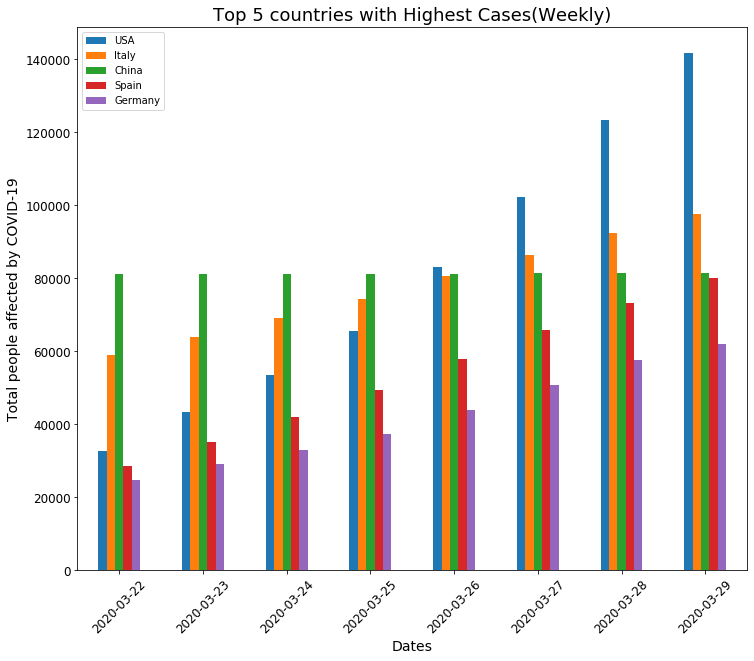

In [35]:
top_countries.plot(kind='bar',figsize=(12, 10))
plt.tick_params(labelsize = 10)
#plt.grid(b=0.3)
plt.tick_params(labelsize = 12)
plt.xticks(rotation=45)
plt.xlabel('Dates', fontsize=14)
plt.ylabel('Total people affected by COVID-19', fontsize=14)
plt.title('Top 5 countries with Highest Cases(Weekly)', fontsize=18)

In [36]:
# Top 5 Countries having maximum number of death cases in last 7 days.

#Sorting the data based on last date
sorted_deaths_datewise = df_deaths_datewise.sort_values(by=df_cases_datewise.columns[-1], ascending=False)

#Fetching top 5 countries with heighest cases
top_countries_by_deaths = sorted_deaths_datewise.iloc[0:5]

#Transposing data for ease of plotting
top_countries_by_deaths = top_countries_by_deaths.transpose()
top_countries_by_deaths

Italy   Spain   China    Iran  France
2020-03-22   5476.0  1756.0  3261.0  1685.0   674.0
2020-03-23   6077.0  2311.0  3270.0  1812.0   860.0
2020-03-24   6820.0  2991.0  3277.0  1934.0  1100.0
2020-03-25   7503.0  3647.0  3281.0  2077.0  1331.0
2020-03-26   8215.0  4365.0  3287.0  2234.0  1696.0
2020-03-27   9134.0  5138.0  3292.0  2378.0  1995.0
2020-03-28  10023.0  5982.0  3295.0  2517.0  2314.0
2020-03-29  10779.0  6803.0  3300.0  2640.0  2606.0

### __H:__Top 5 countries having heighest Death cases.

Text(0.5, 1.0, 'Top 5 countries with Highest Deaths(Weekly)')

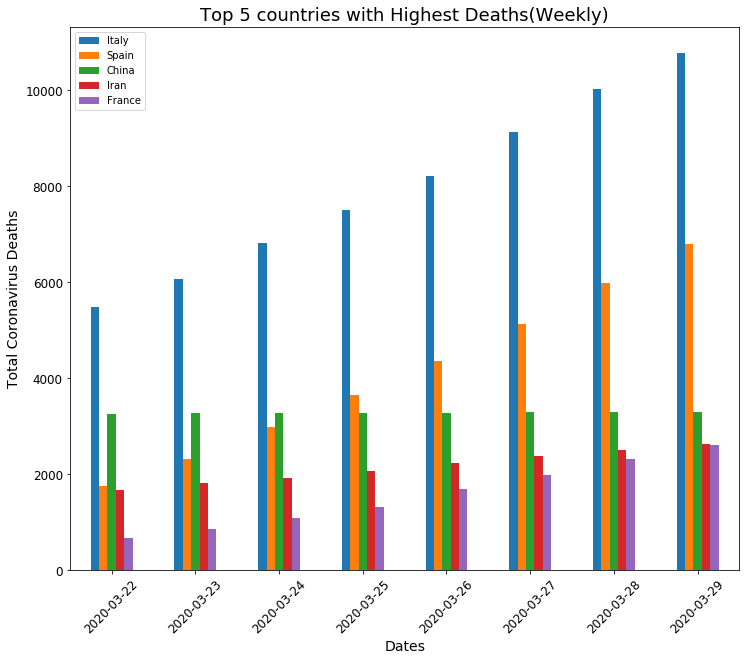

In [37]:
top_countries_by_deaths.plot(kind='bar',figsize=(12, 10))
plt.tick_params(labelsize = 10)
#plt.grid(b=0.3)
plt.tick_params(labelsize = 12)
plt.xticks(rotation=45)
plt.xlabel('Dates', fontsize=14)
plt.ylabel('Total Coronavirus Deaths', fontsize=14)
plt.title('Top 5 countries with Highest Deaths(Weekly)', fontsize=18)

In [38]:
# Creating a dataframe having total deaths against number of people affected by the virus
total_cases_list=[]
total_deaths_list=[]
for date in dates:
    total_cases_list.append(df_cases_datewise[date].sum())
    total_deaths_list.append(df_deaths_datewise[date].sum())

total_cases_df = pd.DataFrame([total_cases_list],columns=dates,index=['Cases'])
total_deaths_df = pd.DataFrame([total_deaths_list],columns=dates,index=['Deaths'])
#Transposing for the desired plot using dataframe
total_deaths_df = total_deaths_df.transpose()
total_cases_df = total_cases_df.transpose()

### __I:__ Growth in Death Rate

Text(0.5, 1.0, 'Total Deaths by COVID-19')

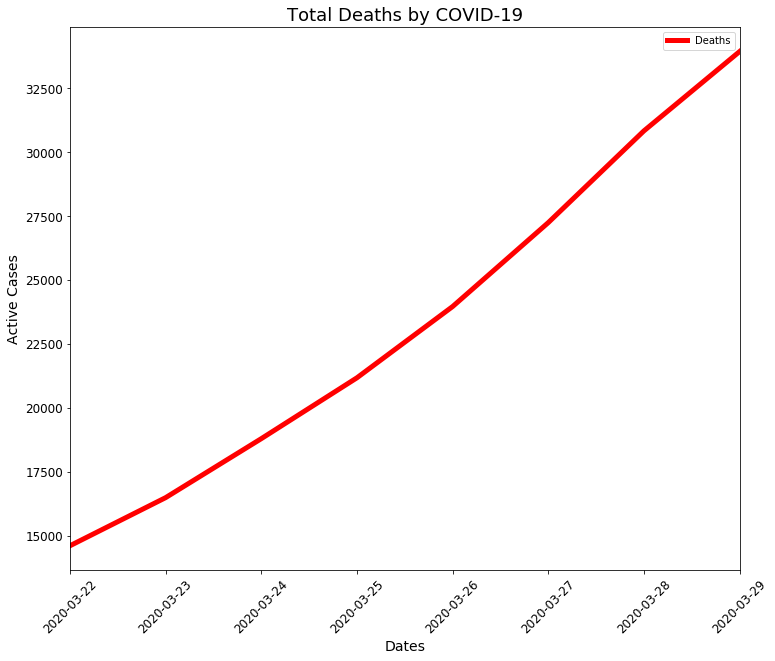

In [39]:
# Trend Showing increase in total death cases over the time.
total_deaths_df.plot(figsize=(12, 10),lw=5,c='red')
plt.tick_params(labelsize = 10)
plt.tick_params(labelsize = 12)
plt.xticks(rotation=45)
plt.xlabel('Dates', fontsize=14)
plt.ylabel('Active Cases', fontsize=14)
plt.title('Total Deaths by COVID-19', fontsize=18)

### __J:__ Growth in Number of Cases Over the World

Text(0.5, 1.0, 'Total Cases of COVID-19')

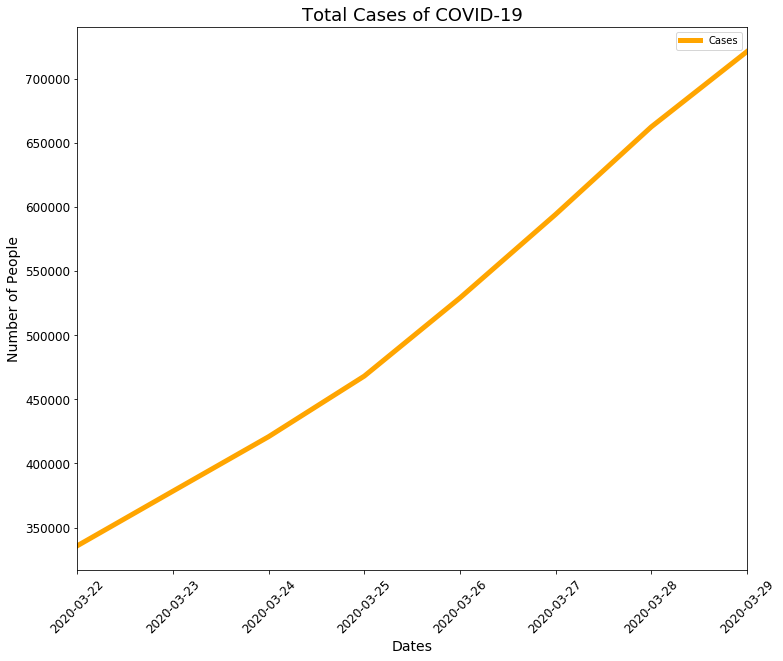

In [40]:
# Trend Showing increase in total active cases over the time.
total_cases_df.plot(figsize=(12, 10), lw=5, c='orange')
plt.tick_params(labelsize = 10)
#plt.grid(b=0.3)
plt.tick_params(labelsize = 12)
plt.xticks(rotation=45)
plt.xlabel('Dates', fontsize=14)
plt.ylabel('Number of People', fontsize=14)
plt.title('Total Cases of COVID-19', fontsize=18)

## CONCLUSION:


__Following insights could be drawn from each visualisation drawn above:__

__A. The table shows number of cases for each country. The table also highlights the maximum number of cases and recovery in each field.__ 

__B. The Heatmap shows the correlation between features. Following are some interesting insights that can be seen:__
- People who are seriously critical have 81% chances of death.
- New cases have only 12% chances of death.
- About 92% of the cases are currently active.
- It is intresting to see that new cases have 93% high chance of death.

__C. A scatter and line graph showing the relation between active cases and total deaths. It can be seen from the graph that if the total active cases are below 10000, deaths are very low. However if the cases are between 60-80K then deaths very high.__

__D. By looking at the bar chart it can be seen that most of the cases are active and mild.__

__E. USA has the maximum number of cases of around 1.4 lakh.__

__F. Most number of deaths are in Italy. More than 10000 deaths.__

__G. According to the graph USA has shown an exponential growth , whereas china remained constant.__

__H. Number of deaths in Italy grows exponentially whereas little growth can be seen in France.__

__I. The number of Deaths have been doubled from 15k to 32K in just 1 week all over the world.__

__J. The number of cases all over the world have been doubled in just seven days.__  